# Comp551 Mini-Project 1

**Import Relevant Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Set the seed for reproducibility (initializes the random number generator)
np.random.seed(500)

# **1. Acquire, preprocess, and analyze the data**


### **1.1 Acquire Data**

In [ ]:
# Hepatitis Dataset
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
hp = pd.read_csv(url1, header=None)

# Diabetic Retinopathy Debrecen dataset
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff"
db = pd.read_csv(url2, header=None, skiprows=24)

### **1.2 Preprocess Data**

#### 1.2.1 Diabetic Reinopathy Debrecen dataset

We first remove all the columns with missing values. After we confirm that there are no more missing values, we move the class column to the front for consistency.

In [ ]:
# AM/FM normal and pathological retinal images.
db.columns = ['Assessment', 'PreScreen', 'MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6','EX1', 'EX2', 'EX3', 'EX4', 'EX5', 'EX6', 'EX7', 'EX8','Euclidean', 'Diameter', 'AM/FM', 'Class']
db = db.dropna()

print("-----------Summary of Dataframe-----------")
display(db.head())

print("-----------Columns with missing values-----------")
print(db.isin(['?']).sum(axis=0))

# move class to the first column
cols = list(db.columns)
cols = [cols[-1]] + cols[:-1]
db = db[cols]


-----------Summary of Dataframe-----------


,Assessment,PreScreen,MA1,MA2,MA3,MA4,MA5,MA6,EX1,EX2,EX3,EX4,EX5,EX6,EX7,EX8,Euclidean,Diameter,AM/FM,Class
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


-----------Columns with missing values-----------
Assessment    0
PreScreen     0
MA1           0
MA2           0
MA3           0
MA4           0
MA5           0
MA6           0
EX1           0
EX2           0
EX3           0
EX4           0
EX5           0
EX6           0
EX7           0
EX8           0
Euclidean     0
Diameter      0
AM/FM         0
Class         0
dtype: int64


#### 1.2.2 Hepatitis dataset

In the HP dataset, there are some attributes that have a lot of missing values. If we were to drop the rows of these attributes, we would lose a lot of data.

We drop the attributes "Protime" and "AlkPhosphate" because they contain many missing values. It's safe to drop these attributes because they do not provide important information for our analysis (explained in the report)



In [ ]:
# Clean data for Hepatitis Dataset
hp.columns = ['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','AlkPhosphate','Sgot','Albumin','Protime','Histology']
print(hp.isin(['?']).sum(axis=0))
hp = hp.drop('Protime', 1)
#hp = hp.drop('AlkPhosphate', 1)
# drop row that contains missing Attribute Values: (indicated by "?")
hp = hp[~hp.eq('?').any(1)]

display(hp.head())


Class              0
Age                0
Sex                0
Steroid            1
Antivirals         0
Fatigue            1
Malaise            1
Anorexia           1
LiverBig          10
LiverFirm         11
SpleenPalpable     5
Spiders            5
Ascites            5
Varices            5
Bilirubin          6
AlkPhosphate      29
Sgot               4
Albumin           16
Protime           67
Histology          0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,Albumin,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,1


In [ ]:
# convert each attribute to the numerical data / categorical type for easier analysis
cols = ['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders','Ascites','Varices','Bilirubin','Sgot','Albumin','Histology']
hp[cols] = hp[cols].apply(pd.to_numeric, errors='coerce')

display(hp.dtypes)
display(db.dtypes)

Class               int64
Age                 int64
Sex                 int64
Steroid             int64
Antivirals          int64
Fatigue             int64
Malaise             int64
Anorexia            int64
LiverBig            int64
LiverFirm           int64
SpleenPalpable      int64
Spiders             int64
Ascites             int64
Varices             int64
Bilirubin         float64
AlkPhosphate       object
Sgot                int64
Albumin           float64
Histology           int64
dtype: object

Class           int64
Assessment      int64
PreScreen       int64
MA1             int64
MA2             int64
MA3             int64
MA4             int64
MA5             int64
MA6             int64
EX1           float64
EX2           float64
EX3           float64
EX4           float64
EX5           float64
EX6           float64
EX7           float64
EX8           float64
Euclidean     float64
Diameter      float64
AM/FM           int64
dtype: object

### **1.3 Analyze Data**


#### **1.3.1 What are the distributions of the positive vs. negative classes?**

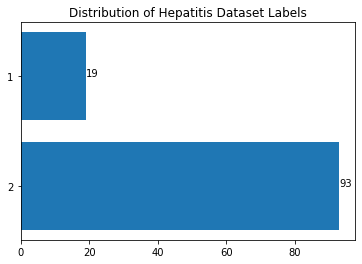

In [ ]:
# Class —> 'live' 
live = hp[hp['Class']==2].shape[0]
# Class -> 'DIE'
die = hp[hp['Class']==1].shape[0]
x = ["2", "1"]
y = [live, die]
plt.title("Distribution of Hepatitis Dataset Labels")
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))

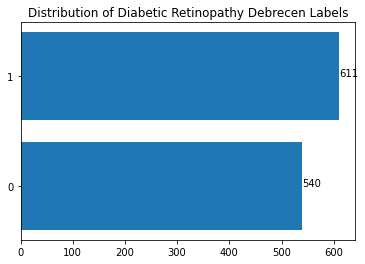

In [ ]:
# Class == 0 -> no signs of DR
noSign = db[db['Class']==0].shape[0]
# Class == 1 -> contains signs of DR
sign = db[db['Class']==1].shape[0]
x = ["0", "1"]
y = [noSign, sign]
plt.title("Distribution of Diabetic Retinopathy Debrecen Labels")
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))

#### **1.3.2 Investigate the correlations of attributes with class**



Histology       Histology         1.000000
LiverBig        LiverBig          1.000000
Bilirubin       Bilirubin         1.000000
Varices         Varices           1.000000
Ascites         Ascites           1.000000
Spiders         Spiders           1.000000
SpleenPalpable  SpleenPalpable    1.000000
LiverFirm       LiverFirm         1.000000
Anorexia        Anorexia          1.000000
Albumin         Albumin           1.000000
Malaise         Malaise           1.000000
Fatigue         Fatigue           1.000000
Antivirals      Antivirals        1.000000
Steroid         Steroid           1.000000
Sex             Sex               1.000000
Age             Age               1.000000
Sgot            Sgot              1.000000
Class           Class             1.000000
Albumin         Ascites           0.592257
Ascites         Albumin           0.592257
dtype: float64


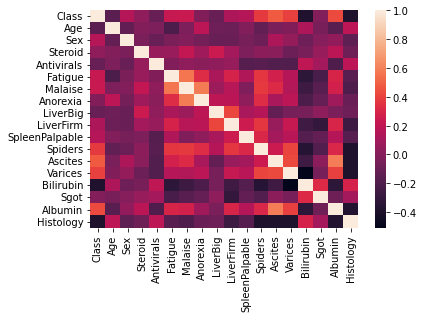

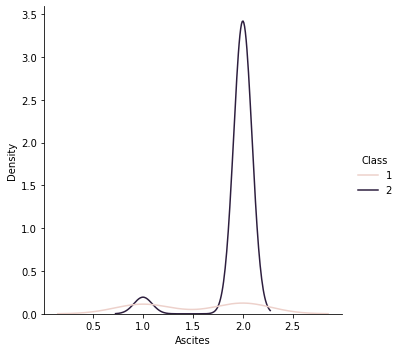

In [ ]:
hpCorrelationMatrix = hp.corr()

c = hpCorrelationMatrix.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so[::-1].head(20))

sb.heatmap(hpCorrelationMatrix)
# ascites has the highest correlation with class
plt.show()

# ascites is highly correlated to class when label = live
sb.displot(x='Ascites',hue='Class',kind='kde',data=hp)
plt.show()

,Class,Assessment,PreScreen,MA1,MA2,MA3,MA4,MA5,MA6,EX1,EX2,EX3,EX4,EX5,EX6,EX7,EX8,Euclidean,Diameter,AM/FM
0,0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,0,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,0,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0


AM/FM       AM/FM         1.000000
EX1         EX1           1.000000
EX8         EX8           1.000000
EX7         EX7           1.000000
EX6         EX6           1.000000
EX5         EX5           1.000000
EX4         EX4           1.000000
EX3         EX3           1.000000
EX2         EX2           1.000000
MA6         MA6           1.000000
Diameter    Diameter      1.000000
MA5         MA5           1.000000
MA4         MA4           1.000000
MA3         MA3           1.000000
MA2         MA2           1.000000
MA1         MA1           1.000000
PreScreen   PreScreen     1.000000
Assessment  Assessment    1.000000
Euclidean   Euclidean     1.000000
Class       Class         1.000000
MA1         MA2           0.996177
MA2         MA1           0.996177
            MA3           0.994221
MA3         MA2           0.994221
MA4         MA3           0.991821
MA3         MA4           0.991821
MA4         MA5           0.988294
MA5         MA4           0.988294
MA1         MA3     

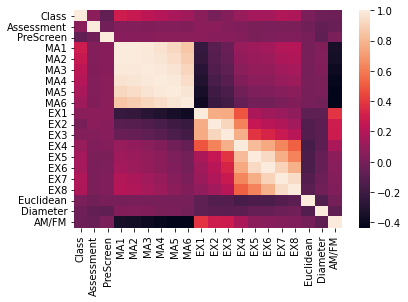

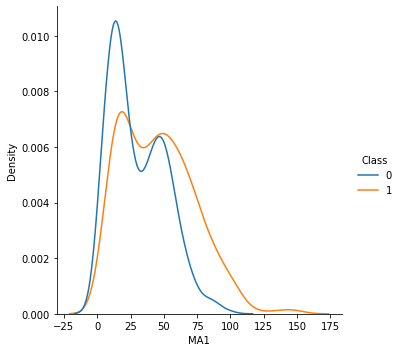

In [ ]:
dbCorrelationMatrix = db.corr()

display(db.head())

c = dbCorrelationMatrix.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so[::-1].head(30))

sb.heatmap(dbCorrelationMatrix)
# MA1 has the highest correlation with class
plt.show()

sb.displot(x='MA1',hue='Class',kind='kde',data=db)
plt.show()

#### **1.3.3 Compute mean/median/std**

In [ ]:
# mean, median, and std
def basicStat(df_features):
  series_dict = {
    "Mean" : df_features.astype(float).mean(),
    "Median" : df_features.astype(float).median(),
    "Std" : df_features.astype(float).std(),
  }

  res = pd.concat(series_dict, axis=1)
  return res
  
hepStat = hp[['Age', 'Sex', 'Bilirubin', 'Sgot', 'Albumin']]
display(basicStat(hepStat))

dbStat = db[['Assessment', 'PreScreen', 'MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6','EX1', 'EX2', 'EX3', 'EX4', 'EX5', 'EX6', 'EX7', 'EX8','Euclidean', 'Diameter', 'AM/FM']]
display(basicStat(dbStat))

,Mean,Median,Std
Age,41.196429,39.0,12.150586
Sex,1.116071,1.0,0.321750
Bilirubin,1.272321,1.0,0.886252
Sgot,78.616071,56.5,68.761010
Albumin,3.834821,4.0,0.576368


,Mean,Median,Std
Assessment,0.996525,1.000000,0.058874
PreScreen,0.918332,1.000000,0.273977
MA1,38.428323,35.000000,25.620913
MA2,36.909644,35.000000,24.105612
MA3,35.140747,32.000000,22.805400
MA4,32.297133,29.000000,21.114767
MA5,28.747176,25.000000,19.509227
MA6,21.151173,18.000000,15.101560
EX1,64.096674,44.249119,58.485289
EX2,23.088012,17.038020,21.602696


In [ ]:
# quantiles of dataset (.25, .50, .75, .95)
display(hepStat.astype(float).quantile([.25, .50, .75, .95]))
display(dbStat.astype(float).quantile([.25, .50, .75, .95]))

,Age,Sex,Bilirubin,Sgot,Albumin
0.25,32.00,1.0,0.70,30.0,3.500
0.50,39.00,1.0,1.00,56.5,4.000
0.75,50.00,1.0,1.40,98.0,4.200
0.95,61.45,2.0,3.09,225.9,4.545


,Assessment,PreScreen,MA1,MA2,MA3,MA4,MA5,MA6,EX1,EX2,EX3,EX4,EX5,EX6,EX7,EX8,Euclidean,Diameter,AM/FM
0.25,1.0,1.0,16.0,16.0,15.0,14.0,11.0,8.0,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.0
0.50,1.0,1.0,35.0,35.0,32.0,29.0,25.0,18.0,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.0
0.75,1.0,1.0,55.0,53.0,51.0,48.0,43.0,32.0,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.0
0.95,1.0,1.0,86.0,80.5,75.0,70.0,63.0,48.0,188.276140,64.525600,31.052979,7.647858,2.475417,0.940187,0.410699,0.184255,0.569021,0.138351,1.0


In [ ]:
# keep the label consistent with the db dataset 
# change positive label from 2 to 0 
# negative label: 1 
hp['Class'] = hp['Class'].replace([2],0)
hp['Histology'] = hp['Histology'].replace([2],0)
cols = ['Steroid','Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable', 'Spiders','Ascites','Varices','Bilirubin']
hp[cols] = hp[cols].replace([2],0)
hp = hp.apply(pd.to_numeric) 

display(hp)


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,Albumin,Histology
0,0,30,2,1,0,0,0,0,1,0,0,0,0,0,1.0,85,18,4.0,1
1,0,50,1,1,0,1,0,0,1,0,0,0,0,0,0.9,135,42,3.5,1
2,0,78,1,0,0,1,0,0,0,0,0,0,0,0,0.7,96,32,4.0,1
5,0,34,1,0,0,0,0,0,0,0,0,0,0,0,0.9,95,28,4.0,1
10,0,39,1,1,1,0,0,0,1,1,0,0,0,0,1.3,78,30,4.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,36,1,0,0,0,0,0,0,0,0,0,0,0,0.6,120,30,4.0,0
151,0,44,1,0,0,1,0,0,0,1,0,0,0,0,0.9,126,142,4.3,0
152,0,61,1,1,0,1,1,0,1,1,0,1,0,0,0.8,75,20,4.1,0
153,0,53,2,1,0,1,0,0,0,0,1,1,0,1,1.5,81,19,4.1,0


In [ ]:
# normalize both datasets

def normalize(x):
  normalized = (x-min(x))/(max(x)-min(x))
  return normalized

hp_normalized = hp.apply(normalize)
db_normalized = db.apply(normalize)

display(hp_normalized.head())
display(db_normalized.head())

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,Albumin,Histology
0,0.0,0.323944,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.208333,0.219331,0.009852,0.59375,1.0
1,0.0,0.605634,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.187500,0.405204,0.068966,0.43750,1.0
2,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145833,0.260223,0.044335,0.59375,1.0
5,0.0,0.380282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187500,0.256506,0.034483,0.59375,1.0
10,0.0,0.450704,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.270833,0.193309,0.039409,0.71875,1.0


,Class,Assessment,PreScreen,MA1,MA2,MA3,MA4,MA5,MA6,EX1,EX2,EX3,EX4,EX5,EX6,EX7,EX8,Euclidean,Diameter,AM/FM
0,0.0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,0.0,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,0.0,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0


# **2. Implement the models**

### **2.1 KNN Model**

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
minkowski = lambda x1, x2, power=3: np.power((np.sum(np.abs(x1 - x2)**power, axis=-1)), 1/power)
class KNN:

  def __init__(self, K=1, dist_fn=euclidean):
    self.K = K
    self.dist_fn = dist_fn
    return

  def fit(self, x, y):
    '''Store the training data using this method as it is a lazy learner'''
    self.x = x
    self.y = y
    self.C = np.max(y) + 1
    return self

  def predict(self, x_test):
    '''Make a prediction using the stored training data and the test data given as arguments'''
    
    # Dimensions of the array
    num_test = x_test.shape[0]
    # Calculate the distance between the training & test samples and returns an array of shape [num_test, num_train]
    distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
    #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
    knns = np.zeros((num_test, self.K), dtype=int)
    # the ith-row of y_prob has the probability distribution over C classes
    y_prob = np.zeros((num_test, self.C))

    for i in range(num_test):
      dist = distances[i]
      knns[i,:] = np.argsort(dist)[:self.K]
      # count the number of instances of each class in the K-closest training samples
      y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)

    # Divide by K to get a probability distribution
    y_prob /= self.K
    return y_prob, knns


### **2.2 Decision Tree Model**

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

# Initialize binary tree node to store information of decision tree
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [ ]:
# greedy splitting a node - consider all possible feature-value combinations for splitting the data given a node
# returns one such test that produces the lowest cost given a supplied cost function

def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
# implement three possible cost functions
# computes misclassification cost by subtracting the maximum probability of any class

def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
# implement Decision Tree class

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

In [ ]:
# implement fit function

def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    # print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

In [ ]:
# implement predict function

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

### **2.3 Evaluation Metrics**

We define accuracy, precision and recall as three evaluation metrics for measuring the performance of the model. Note that it may be a multi-classification problem, so the confusion matrix does not always directly yield the TP, FP, TN, FN values to directly compute the metrics.



1.   
The **accuracy** can be directly computed by taking the sum of the diagoals over the sum of the entire matrix.
2.
The **precision** can be computed for each class by taking the sum of the diagonals over the sum of the class's column. The precision of the entire model is computed by taking the mean of all precisions.
3.
The **recall** can be computed for each class by taking the sum of the diagonals over the sum of the class's row. The recall of the entire model is computed by taking the mean of all recalls.

In [ ]:
# confusion matrix tells us how many items in one class (rows) are assigned to another class by a classifier (columns)
# more reading for multi-class confusion matrix: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

def confusion_matrix(y, yh):
    n_classes = np.max(y) + 1
    c_matrix = np.zeros((n_classes, n_classes))
    for c1 in range(n_classes):
        for c2 in range(n_classes):
            #(y==c1)*(yh==c2) is 1 when both conditions are true or 0
            c_matrix[c1, c2] = np.sum((y==c1)*(yh==c2))
    return c_matrix

In [ ]:
def evaluate_acc(y, yhat):
  cmat = confusion_matrix(y, yhat)
  return np.sum(np.diag(cmat)) / np.sum(cmat)

In [ ]:
def evaluate_precision(y, yhat):
  cmat = confusion_matrix(y, yhat)
  all_precisions = np.diag(cmat) / np.sum(cmat, axis=0)
  return np.mean(all_precisions)

In [ ]:
def evaluate_recall(y, yhat):
  cmat = confusion_matrix(y, yhat)
  all_recalls = np.diag(cmat) / np.sum(cmat, axis=1)
  return np.mean(all_recalls)

# **3. Run Experiments**

### 3.1 Utility functions

In [ ]:
from pandas import DataFrame

def splitSets(df: DataFrame, TRAIN_SET_PERCENTAGE=0.8, VALIDATION_SET_PERCENTAGE=0.1) -> None:
  # test set percentage is 1.0 - train_set - validation_set
  df_neg = df.loc[df['Class'] == 0]
  df_pos = df.loc[df['Class'] == 1]

  # Get everything except first col (Class col)
  # x_neg/pos = df with all values y_neg/pos = 1d arr with all 1 or 0
  x_neg, y_neg = df_neg.iloc[:,1:].to_numpy(), df_neg['Class'].to_numpy()
  x_pos, y_pos = df_pos.iloc[:,1:].to_numpy(), df_pos['Class'].to_numpy()

  # Ensure positive and negative classes are split evenly
  indp = np.random.permutation(x_pos.shape[0])
  indn = np.random.permutation(x_neg.shape[0])

  # Find indices to split at
  TRAIN_SPLIT_POS_AMT = round(TRAIN_SET_PERCENTAGE*len(df_pos))
  TRAIN_SPLIT_NEG_AMT = round(TRAIN_SET_PERCENTAGE*len(df_neg))
  VAL_SPLIT_POS_AMT = TRAIN_SPLIT_POS_AMT + round(VALIDATION_SET_PERCENTAGE*len(df_pos))
  VAL_SPLIT_NEG_AMT = TRAIN_SPLIT_NEG_AMT + round(VALIDATION_SET_PERCENTAGE*len(df_neg))

  # Training set data 
  x_train_pos, x_train_neg = x_pos[indp[:TRAIN_SPLIT_POS_AMT]], x_neg[indn[:TRAIN_SPLIT_NEG_AMT]]
  x_train = np.concatenate((x_train_pos, x_train_neg), axis = 0)

  # Training set column
  y_train_pos, y_train_neg = y_pos[indp[:TRAIN_SPLIT_POS_AMT]], y_neg[indn[:TRAIN_SPLIT_NEG_AMT]]

  # Training set
  y_train = np.concatenate((y_train_pos, y_train_neg), axis = 0)


  # Validation set data
  x_val_pos = x_pos[indp[TRAIN_SPLIT_POS_AMT:VAL_SPLIT_POS_AMT]]
  x_val_neg = x_neg[indn[TRAIN_SPLIT_NEG_AMT:VAL_SPLIT_NEG_AMT]]
  x_validation = np.concatenate((x_val_pos, x_val_neg), axis = 0)

  # Validation set column
  y_val_pos = y_pos[indp[TRAIN_SPLIT_POS_AMT:VAL_SPLIT_POS_AMT]]
  y_val_neg = y_neg[indn[TRAIN_SPLIT_NEG_AMT:VAL_SPLIT_NEG_AMT]]

  # Validation set
  y_validation = np.concatenate((y_val_pos, y_val_neg), axis = 0)


  # Test set data
  x_test_pos = x_pos[indp[VAL_SPLIT_POS_AMT:]]
  x_test_neg = x_neg[indn[VAL_SPLIT_NEG_AMT:]]
  x_test = np.concatenate((x_test_pos, x_test_neg), axis = 0)

  # Test set column
  y_test_pos = y_pos[indp[VAL_SPLIT_POS_AMT:]]
  y_test_neg = y_neg[indn[VAL_SPLIT_NEG_AMT:]]

  # Test set
  y_test = np.concatenate((y_test_pos, y_test_neg), axis = 0)

  return x_train, y_train.astype(int), x_validation, y_validation.astype(int), x_test, y_test.astype(int)


In [ ]:
# Plot the mean square error for different K values stored in K_list
def errPlot(
    K_list, bestK, max_value, max_training_value, acc, acc_train)\
                                                                        -> None:
      print(f'Best training accuracy is {max_training_value*100:.1f}.')
      print(f'Best validation accuracy is {max_value*100:.1f}.')
      print('The corresponding best K is:', bestK)
      plt.plot(K_list, acc_train, '-', label='train', color='g')
      plt.plot(K_list, acc, '-', label='validation', color='r')
      plt.legend()
      plt.xlabel('K (number of neighbours)')
      plt.ylabel('Accuracy')
      plt.show()

### 3.2 KNN 

#### **3.2.1 Finding best K value**

In [ ]:
from typing import Union, Tuple, Any

# define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

# Determine best hyper-parameter K from range 1 to n-1
# n being the number of datapoints on the train set
def findBestHyperparamForAccuracy(x_train, y_train, x_test, y_test, dist_fn=euclidean)\
                         -> Tuple[Union[float, Any], int, Union[Any, KNN]]:
  K_list = range(1,30)

  all_accuracies = []
  all_training_accuracies = []
  
  bestK = -1
  max_accuracy, max_training_accuracy = 0.0, 0.0

  for i, k in enumerate(K_list):
    # Create model    
    model: KNN = KNN(K=k, dist_fn=dist_fn).fit(x_train, y_train)

    # Predict on training and testing data
    y_prob_train, knns_train = model.predict(x_train)
    y_prob, knns = model.predict(x_test)
    

    # Gets hard predictions by choosing the class with the maximum probability
    # Returns index of largest element in array
    y_prediction: list = np.argmax(y_prob, axis=-1)
    y_training_prediction: list = np.argmax(y_prob_train, axis=-1)

    # Calculate accuracy
    accuracy: float = evaluate_acc(y_prediction, y_test)
    accuracy_train: float = evaluate_acc(y_training_prediction, y_train)

    all_accuracies.append(accuracy)
    all_training_accuracies.append(accuracy_train)

    # If higher accuracy, update
    if (accuracy > max_accuracy):
      bestK = k
      bestModel = model
      max_accuracy = accuracy
      print(max_accuracy)
      max_training_accuracy = accuracy_train

    # boolean array to later slice the indexes of correct and incorrect predictions
    correct: np.ndarray = y_test == y_prediction
    incorrect: np.ndarray = np.logical_not(correct)

    max_predict = np.argmax(model.predict(x_test)[0], axis = -1)
    max_train = np.argmax(model.predict(x_train)[0], axis = -1)

  
  errPlot(K_list, bestK, max_accuracy, max_training_accuracy, all_accuracies, all_training_accuracies)

  return bestModel
  

In [ ]:
# Split data into train, validation, test sets
# Diabetic Retinopathy

x_train_db, y_train_db, x_val_db, y_val_db, x_test_db, y_test_db = splitSets(db_normalized)

# Hepatitis 
x_train_hp, y_train_hp, x_val_hp, y_val_hp, x_test_hp, y_test_hp = splitSets(hp_normalized)

----------KNN models on Diabetic Retinopathy dataset-----------
Euclidean
0.6173913043478261
0.6347826086956522
0.6608695652173913
Best training accuracy is 71.9.
Best validation accuracy is 66.1.
The corresponding best K is: 9


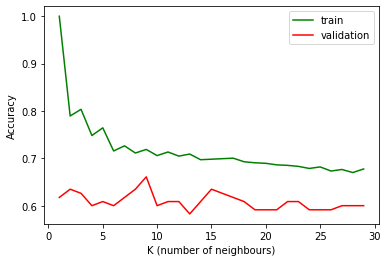

Manhattan
0.6434782608695652
0.6608695652173913
0.6695652173913044
Best training accuracy is 69.9.
Best validation accuracy is 67.0.
The corresponding best K is: 15


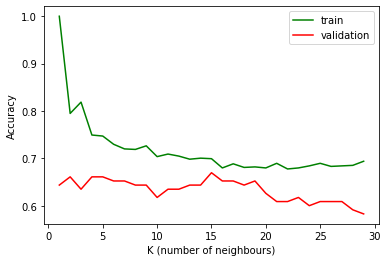

Minkowski
0.6
0.6260869565217392
Best training accuracy is 78.7.
Best validation accuracy is 62.6.
The corresponding best K is: 2


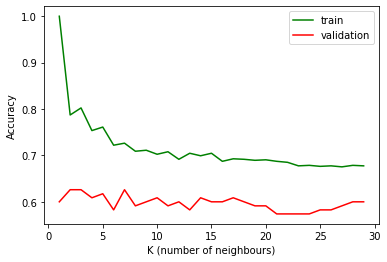

----------KNN models on Hepatitis dataset-----------
Euclidean
0.5454545454545454
0.8181818181818182
0.9090909090909091
1.0
Best training accuracy is 80.9.
Best validation accuracy is 100.0.
The corresponding best K is: 14


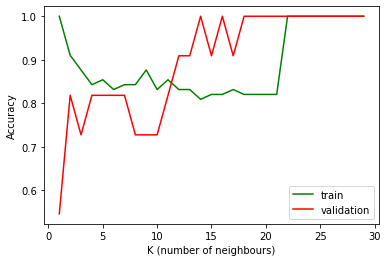

Manhattan
0.5454545454545454
0.8181818181818182
0.9090909090909091
1.0
Best training accuracy is 80.9.
Best validation accuracy is 100.0.
The corresponding best K is: 14


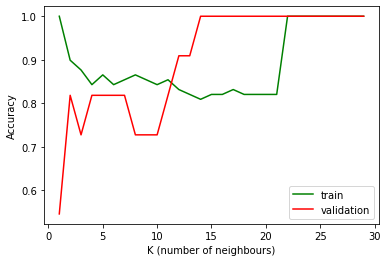

Minkowski
0.5454545454545454
0.8181818181818182
0.9090909090909091
1.0
Best training accuracy is 82.0.
Best validation accuracy is 100.0.
The corresponding best K is: 14


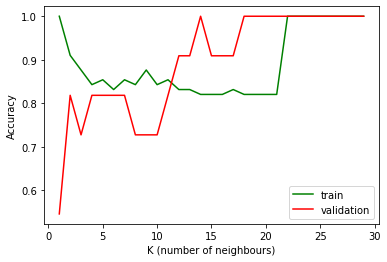

In [ ]:
# Compare different distance functions
print("----------KNN models on Diabetic Retinopathy dataset-----------")
print("Euclidean")
eucliModelDB = findBestHyperparamForAccuracy(
    x_train_db,
    y_train_db,
    x_val_db,
    y_val_db)

print("Manhattan")
manhaModelDB = findBestHyperparamForAccuracy(
    x_train_db,
    y_train_db,
    x_val_db,
    y_val_db,
    dist_fn=manhattan)

print("Minkowski")
MinkModelDB = findBestHyperparamForAccuracy(
    x_train_db,
    y_train_db,
    x_val_db,
    y_val_db,
    dist_fn=minkowski)


# HP
print("----------KNN models on Hepatitis dataset-----------")
print("Euclidean")
eucliModelHP = findBestHyperparamForAccuracy(
    x_train_hp,
    y_train_hp,
    x_val_hp,
    y_val_hp)

print("Manhattan")
manhaModelHP = findBestHyperparamForAccuracy(
    x_train_hp,
    y_train_hp,
    x_val_hp,
    y_val_hp,
    dist_fn=manhattan)

print("Minkowski")
MinkModelHP = findBestHyperparamForAccuracy(
    x_train_hp,
    y_train_hp,
    x_val_hp,
    y_val_hp,
    dist_fn=minkowski)

#### **3.2.2 Determining test accuracy using best K value**

In [ ]:
# Predictions on KNN model
def predictTestOnBestHyperparam(bestModel, x_train, y_train, x_test, y_test):
    bestModel = bestModel.fit(x_train, y_train)

    y_prob_test, knns_test = bestModel.predict(x_test)
    y_prob_train, knns_train = bestModel.predict(x_train)

    # To get hard predictions by choosing the class with the maximum probability
    y_test_prediction = np.argmax(y_prob_test, axis=-1)
    accuracy = evaluate_acc(y_test_prediction, y_test)

    y_training_prediction = np.argmax(y_prob_train,axis = -1)
    accuracy_train = evaluate_acc(y_training_prediction, y_train)

    print(f'The training accuracy is {accuracy_train*100:.1f}.')
    print(f'Test test accuracy is {accuracy*100:.1f}.')
    print('The chosen best k is:', bestModel.K)

    # boolean array to later slice the indexes of correct and incorrect predictions
    correct = y_test == y_test_prediction
    incorrect = np.logical_not(correct)

    #visualization of the points
    plt.scatter(
        x_train[:,0],
        x_train[:,1],
        c=y_train,
        marker='o',
        alpha=.2,
        label='train')
    
    plt.scatter(
        x_test[correct,0],
        x_test[correct,1],
        marker='.',
        c=y_test_prediction[correct],
        label='correct')
    
    plt.scatter(
        x_test[incorrect,0],
        x_test[incorrect,1],
        marker='x',
        c=y_test_prediction[incorrect],
        label='misclassified')

    #connect each node to k-nearest neighbours in the training set
    for i in range(x_test.shape[0]):
        for k in range(bestModel.K):
            hor = x_test[i,0], x_train[knns_test[i,k], 0]
            ver = x_test[i,1], x_train[knns_test[i,k], 1]
            plt.plot(hor, ver, 'k-', alpha=.1)
        
    plt.ylabel('second feature')
    plt.xlabel('first feature')
    plt.legend()
    plt.show()

    return y_test_prediction
    

----------Predictions of KNN model variants on DB dataset-----------
Euclidean
The training accuracy is 71.9.
Test test accuracy is 66.1.
The chosen best k is: 9


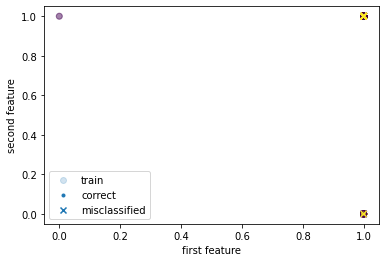

Manhattan
The training accuracy is 69.9.
Test test accuracy is 67.0.
The chosen best k is: 15


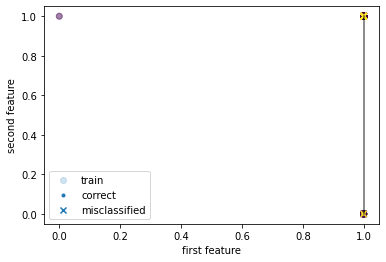

Minkowski
The training accuracy is 78.7.
Test test accuracy is 62.6.
The chosen best k is: 2


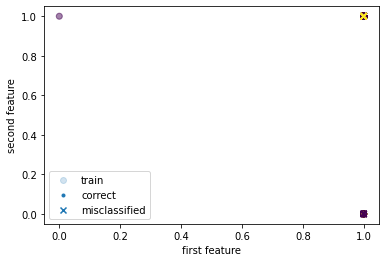

----------Predictions of KNN model variants on HP dataset-----------
Euclidean
The training accuracy is 80.9.
Test test accuracy is 91.7.
The chosen best k is: 14


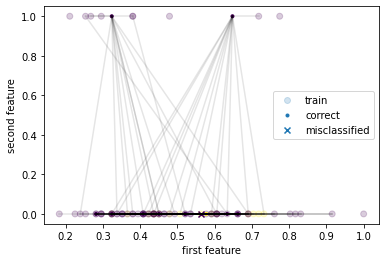

Manhattan
The training accuracy is 80.9.
Test test accuracy is 91.7.
The chosen best k is: 14


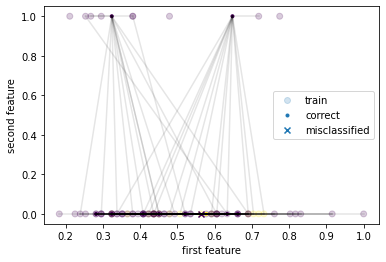

Minkowski
The training accuracy is 82.0.
Test test accuracy is 91.7.
The chosen best k is: 14


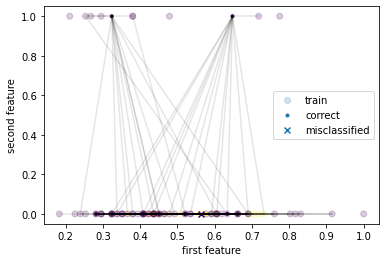

In [ ]:
# Predictions
print("----------Predictions of KNN model variants on DB dataset-----------")
print("Euclidean")
pred1 = predictTestOnBestHyperparam(eucliModelDB, x_train_db, y_train_db, x_val_db, y_val_db)
print("Manhattan")
pred2 = predictTestOnBestHyperparam(manhaModelDB, x_train_db, y_train_db, x_val_db, y_val_db)
print("Minkowski")
pred3 = predictTestOnBestHyperparam(MinkModelDB, x_train_db, y_train_db, x_val_db, y_val_db)

print("----------Predictions of KNN model variants on HP dataset-----------")
print("Euclidean")
pred4 = predictTestOnBestHyperparam(eucliModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Manhattan")
pred5 = predictTestOnBestHyperparam(manhaModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Minkowski")
pred6 = predictTestOnBestHyperparam(MinkModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

#### **3.2.3 Plotting decision boundaries**

In [ ]:
def plotKNNDecisionBoundaries(model, x, y, x_train, y_train, feature1, feature2): 
    #we can make the grid finer by increasing the number of samples from 200 to higher value
    x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
    x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
    #to features values as a mesh  
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
    
    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

    y_prob_all, _ = model.fit(x_train[:, 0:2], y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    plt.scatter(x_train[:,0], x_train[:,1], c=np.argmax(y_train_prob, axis=-1), marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis=-1), marker='.', alpha=0.01)
    plt.ylabel(feature2)
    plt.xlabel(feature1)
    plt.show()

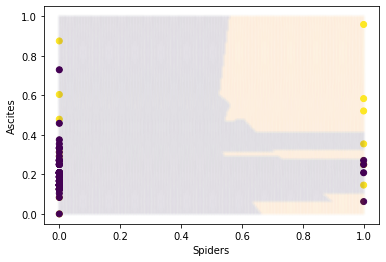

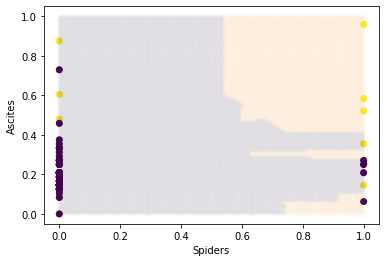

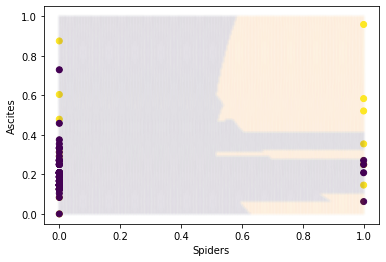

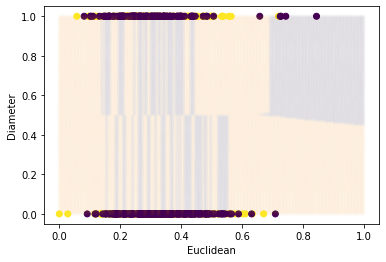

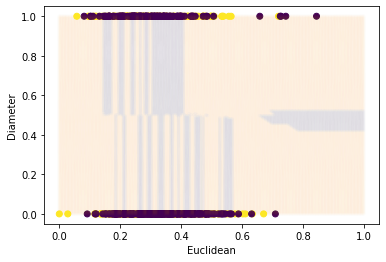

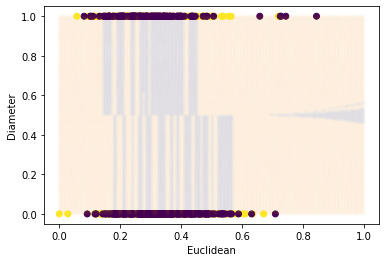

In [ ]:
xDb, yDb = db_normalized.iloc[:,1:].to_numpy(), db_normalized["Class"]
(num_instances, num_features), num_classes = xDb.shape, len(np.unique(yDb))

xHp, yHp = hp_normalized.iloc[:,1:].to_numpy(), hp_normalized["Class"]
(num_instances, num_features), C = xHp.shape, len(np.unique(yHp))

hp_feature1 = "Spiders"
hp_feature2 = "Ascites"

sliced_x_train_hp1 = x_train_hp[:, [11, 13]] 

plotKNNDecisionBoundaries(eucliModelHP, xHp, yHp, sliced_x_train_hp1, y_train_hp, hp_feature1, hp_feature2)
plotKNNDecisionBoundaries(manhaModelHP, xHp, yHp, sliced_x_train_hp1, y_train_hp, hp_feature1, hp_feature2)
plotKNNDecisionBoundaries(MinkModelHP, xHp, yHp, sliced_x_train_hp1, y_train_hp, hp_feature1, hp_feature2)

db_feature1 = "Euclidean"
db_feature2 = "Diameter"
sliced_x_train_db1 = x_train_db[:, [17, 18]]
plotKNNDecisionBoundaries(eucliModelDB, xDb, yDb, sliced_x_train_db1, y_train_db, db_feature1, db_feature2)
plotKNNDecisionBoundaries(manhaModelDB, xDb, yDb, sliced_x_train_db1, y_train_db, db_feature1, db_feature2)
plotKNNDecisionBoundaries(MinkModelHP, xDb, yDb, sliced_x_train_db1, y_train_db, db_feature1, db_feature2)


### 3.3 Decision Tree

 #### **3.3.1 Finding optimal depth**

In [ ]:

x_train_db, y_train_db, x_val_db, y_val_db, x_test_db, y_test_db = splitSets(db_normalized)
# Hepatitis 
x_train_hp, y_train_hp, x_val_hp, y_val_hp, x_test_hp, y_test_hp = splitSets(hp_normalized)

def maxDepths(x_train, y_train, x_test, y_test, depthList, costFunc):
  training_accuracies =[]
  test_accuracies = []
  optimalDepth = 0
  max_accuracy = 0.0

  for depth in depthList:
    dTree = DecisionTree(max_depth=depth, cost_fn=costFunc)
    dTree = dTree.fit(x_train, y_train)

    predTrain = dTree.predict(x_train)
    y_predTrain = np.argmax(predTrain,1)
    accuracyTrain = evaluate_acc(y_predTrain, y_train)
    training_accuracies.append(accuracyTrain)

    predTest = dTree.predict(x_test)
    y_predTest = np.argmax(predTest,1)
    accuracyTest = evaluate_acc(y_predTest, y_test)
    test_accuracies.append(accuracyTest)
    
    if (accuracyTest > max_accuracy):
        max_accuracy = accuracyTest
        optimalDepth = depth

  print("Optimal Depth: ", optimalDepth)
  print("Accuracy with optimal depth", max_accuracy)
  plt.plot(depthList, training_accuracies, '-', label='train', color='g')
  plt.plot(depthList, test_accuracies, '-', label='validation', color='b')
  plt.legend()
  plt.xlabel('max depth')
  plt.ylabel('accuracy')
  plt.show()  
  return optimalDepth

---------Decision Tree model Optimal Depth on HP dataset-----------
Optimal Depth:  2
Accuracy with optimal depth 0.8181818181818182


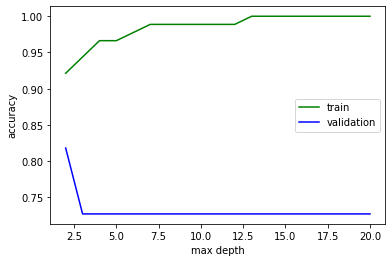

Optimal Depth:  2
Accuracy with optimal depth 0.8181818181818182


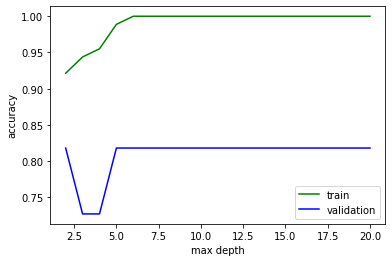

Optimal Depth:  2
Accuracy with optimal depth 1.0


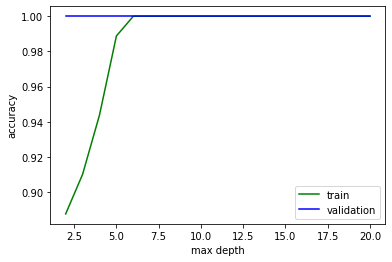

---------Decision Tree model Optimal Depth on DB dataset-----------
Optimal Depth:  17
Accuracy with optimal depth 0.6260869565217392


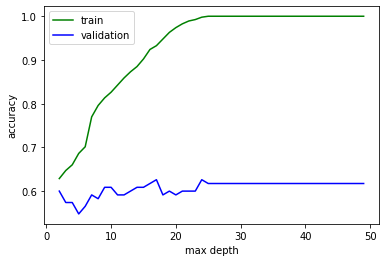

Optimal Depth:  2
Accuracy with optimal depth 0.6956521739130435


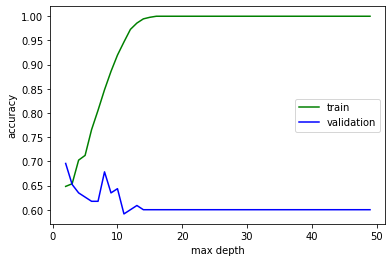

Optimal Depth:  8
Accuracy with optimal depth 0.7652173913043478


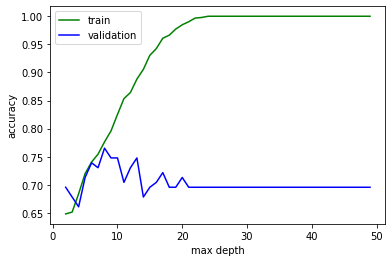

In [ ]:
print("---------Decision Tree model Optimal Depth on HP dataset-----------")
depthList1 = list(range(2, 21))
missdepth1 = maxDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp, depthList1, cost_misclassification)
ginidepth1 = maxDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp, depthList1, cost_gini_index)
endepth1 = maxDepths(x_train_hp, y_train_hp, x_val_hp, y_val_hp, depthList1, cost_entropy)

print("---------Decision Tree model Optimal Depth on DB dataset-----------")
depthList2 = list(range(2, 50))
missdepth2 = maxDepths(x_train_db, y_train_db, x_test_db, y_test_db, depthList2, cost_misclassification)

ginidepth2 = maxDepths(x_train_db, y_train_db, x_test_db, y_test_db,depthList2, cost_gini_index)

endepth2 = maxDepths(x_train_db, y_train_db, x_test_db, y_test_db,depthList2, cost_entropy)

 #### **3.3.2 Estimating performance using test set**


In [ ]:
# Use test set to estimate the performance
def predTreeOnTest(decisionTree, x_train, y_train, x_test, y_test):
  decisionTree.fit(x_train, y_train)

  predT = decisionTree.predict(x_train)
  y_predT = np.argmax(predT,1)
  accuracy = evaluate_acc(y_predT, y_train)
  print("Training Accuracy :", accuracy)
  predTest = decisionTree.predict(x_test)
  y_predTest = np.argmax(predTest,1)
  accuracyTest = evaluate_acc(y_predTest, y_test)
  print("Testing Accuracy :", accuracyTest)

  # visualization
  correct = y_test == y_predTest
  incorrect = np.logical_not(correct)
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
  plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_predTest[correct], label='correct')
  plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
  plt.legend()
  plt.show()

  return accuracy, accuracyTest

Test set to estimate the performance with Misclassification Cost: Hepatitis
Training Accuracy : 0.9213483146067416
Testing Accuracy : 0.75


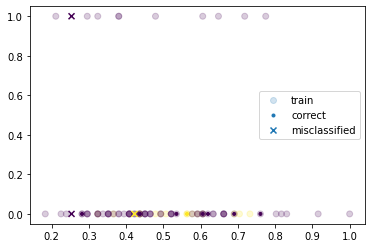

Use test set to estimate the performance with Misclassification Cost: Diabetic
Training Accuracy : 0.9326818675352877
Testing Accuracy : 0.6260869565217392


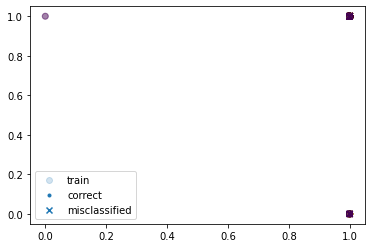

Use test set to estimate the performance with Entropy: Hepatitis
Training Accuracy : 0.8876404494382022
Testing Accuracy : 0.8333333333333334


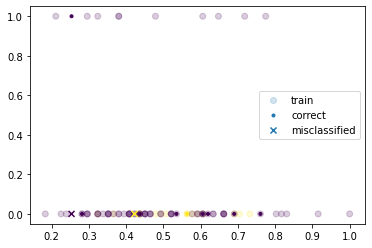

Use test set to estimate the performance with Entropy: Diabetic
Training Accuracy : 0.7763300760043431
Testing Accuracy : 0.7652173913043478


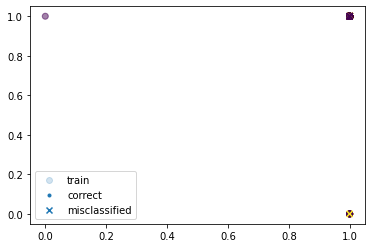

Use test set to estimate the performance with Gini Index: Hepatitis
Training Accuracy : 0.9213483146067416
Testing Accuracy : 0.75


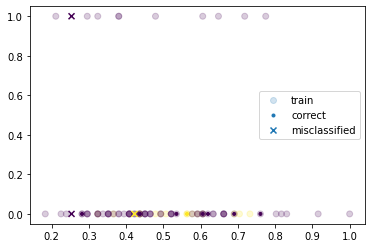

Use test set to estimate the performance with Gini Index: Diabetic
Training Accuracy : 0.6482084690553745
Testing Accuracy : 0.6956521739130435


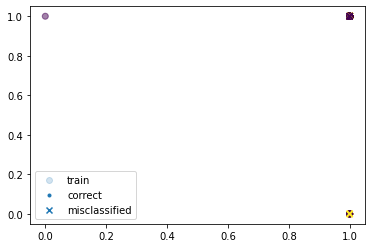

In [ ]:
print("Test set to estimate the performance with Misclassification Cost: Hepatitis")
missTree1 = DecisionTree(max_depth=missdepth1, cost_fn=cost_misclassification)
accM1, accTestM1 = predTreeOnTest(missTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

print("Use test set to estimate the performance with Misclassification Cost: Diabetic")
missTree2 = DecisionTree(max_depth=missdepth2, cost_fn=cost_misclassification)
accM2, accTestM2 = predTreeOnTest(missTree2, x_train_db, y_train_db, x_test_db, y_test_db)

print("Use test set to estimate the performance with Entropy: Hepatitis")
enTree1 = DecisionTree(max_depth=endepth1, cost_fn=cost_entropy)
accE1, accTestE1 = predTreeOnTest(enTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

print("Use test set to estimate the performance with Entropy: Diabetic")
enTree2 = DecisionTree(max_depth=endepth2,cost_fn=cost_entropy)
accE2, accTestE2 = predTreeOnTest(enTree2, x_train_db, y_train_db, x_test_db, y_test_db)

print("Use test set to estimate the performance with Gini Index: Hepatitis")
giniTree1 = DecisionTree(max_depth=ginidepth1, cost_fn=cost_gini_index)
accG1, accTest1 = predTreeOnTest(giniTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Use test set to estimate the performance with Gini Index: Diabetic")
giniTree2 = DecisionTree(max_depth=ginidepth2, cost_fn=cost_gini_index)
accG2, accTest2 = predTreeOnTest(giniTree2, x_train_db, y_train_db, x_test_db, y_test_db)

 #### **3.3.3 Testing cost functions**

Test 3 different costs functions at depth 2 for Hepatitis Dataset
Misclassification Accuracy
Training Accuracy : 0.9213483146067416
Testing Accuracy : 0.75


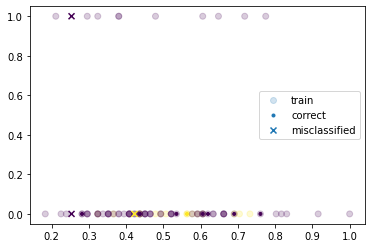

Entroy Accuracy
Training Accuracy : 0.8876404494382022
Testing Accuracy : 0.8333333333333334


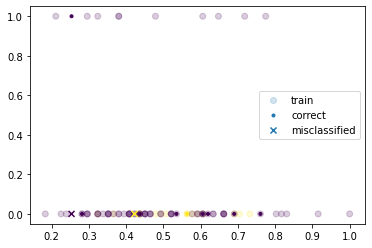

Gini Index Accuracy
Training Accuracy : 0.9213483146067416
Testing Accuracy : 0.75


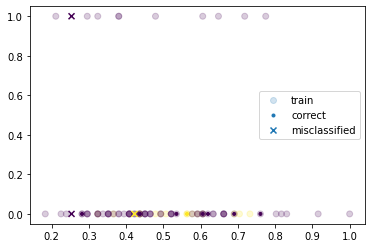

Test 3 different costs functions at depth 2 for Hepatitis Dataset
Misclassification Accuracy
Training Accuracy : 0.6286644951140065
Testing Accuracy : 0.6


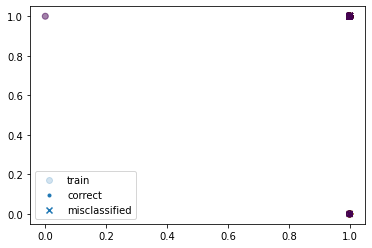

Entroy Accuracy
Training Accuracy : 0.6482084690553745
Testing Accuracy : 0.6956521739130435


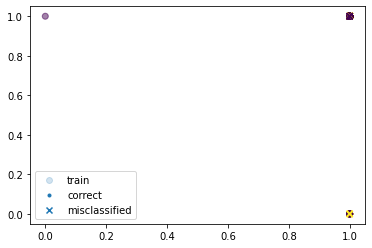

Gini Index Accuracy
Training Accuracy : 0.6482084690553745
Testing Accuracy : 0.6956521739130435


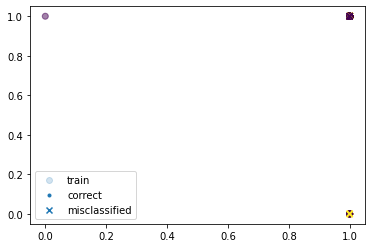

(0.6482084690553745, 0.6956521739130435)

In [ ]:
# fix the depth value to 2
print("Test 3 different costs functions at depth 2 for Hepatitis Dataset")
tree1 = DecisionTree(max_depth=2, cost_fn=cost_misclassification)
tree2 = DecisionTree(max_depth=2, cost_fn=cost_entropy)
tree3 = DecisionTree(max_depth=2, cost_fn=cost_gini_index)

print("Misclassification Accuracy")
predTreeOnTest(tree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Entroy Accuracy")
predTreeOnTest(tree2, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Gini Index Accuracy")
predTreeOnTest(tree3, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

print("Test 3 different costs functions at depth 2 for Hepatitis Dataset")
print("Misclassification Accuracy")
predTreeOnTest(tree1, x_train_db, y_train_db, x_test_db, y_test_db)
print("Entroy Accuracy")
predTreeOnTest(tree2, x_train_db, y_train_db, x_test_db, y_test_db)
print("Gini Index Accuracy")
predTreeOnTest(tree3, x_train_db, y_train_db, x_test_db, y_test_db)

 #### **3.3.4 Present plots of decision boundary for each model**


In [ ]:
def plotDTDecisionBoundaries(model, x, y, x_train, y_train, feature1, feature2): 
    #we can make the grid finer by increasing the number of samples from 200 to higher value
    x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
    x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
    #to features values as a mesh  
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
    
    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

    y_prob_all = model.fit(x_train[:, 0:2], y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    plt.scatter(x_train[:,0], x_train[:,1], c=np.argmax(y_train_prob, axis=-1), marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=np.argmax(y_pred_all, axis=-1), marker='.', alpha=0.01)
    plt.ylabel(feature2)
    plt.xlabel(feature1)
    plt.show()

----------KNN----------
-----Euclidean------
--Hepatitis--


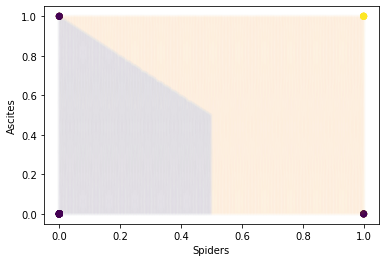

--Diabetic--


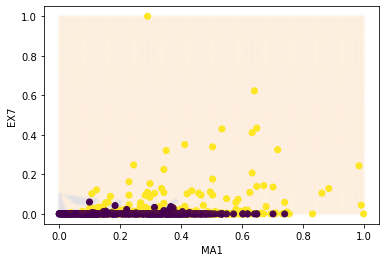

-----Manhattan------
--Hepatitis--


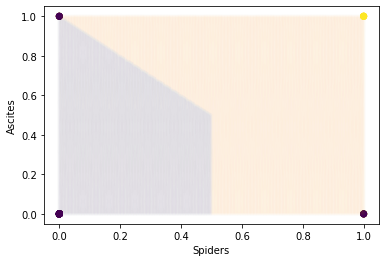

--Diabetic--


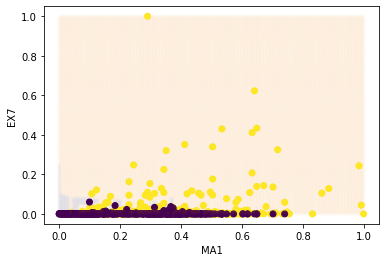

-----Minkowski------
--Hepatitis--


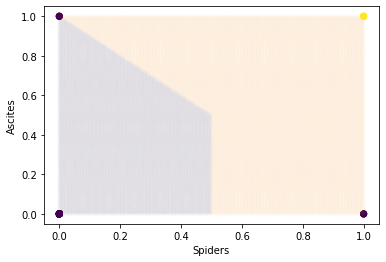

--Diabetic--


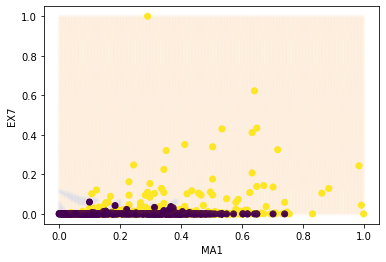

----------Decision Tree----------
-----Misclassification------
--Hepatitis--


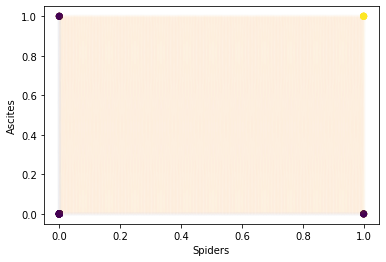

--Diabetic--


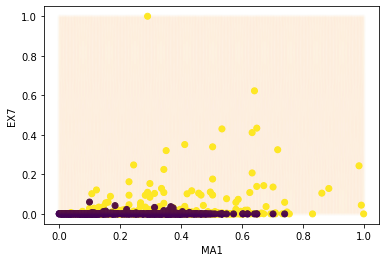

-----Entropy------
--Hepatitis--


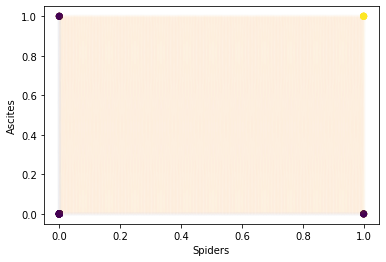

--Diabetic--


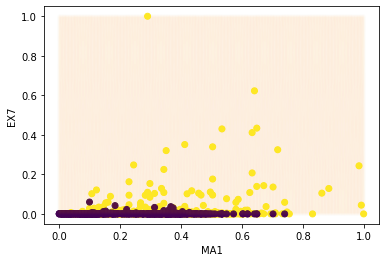

-----Minkowski------
--Hepatitis--


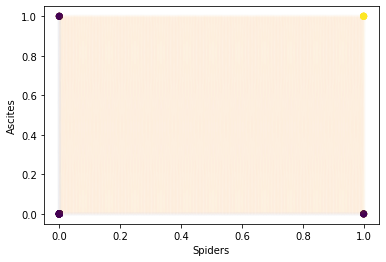

--Diabetic--


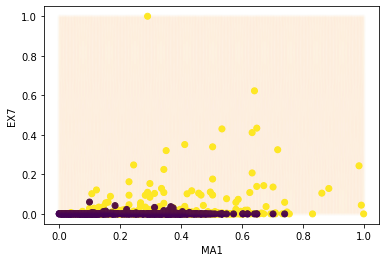

In [ ]:
sliced_x_train_hp1 = x_train_hp[:, [11, 12]] # Spiders, Ascites
sliced_x_train_db1 = x_train_db[:, [3, 15]]

print("----------KNN----------")
print("-----Euclidean------")
model1 = KNN(dist_fn=euclidean)
print("--Hepatitis--")
plotKNNDecisionBoundaries(model1, xHp, yHp, sliced_x_train_hp1, y_train_hp, 'Spiders','Ascites')
print("--Diabetic--")
plotKNNDecisionBoundaries(model1, xDb, yDb, sliced_x_train_db1, y_train_db,  'MA1','EX7')

print("-----Manhattan------")
model2 = KNN(dist_fn=manhattan)
print("--Hepatitis--")
plotKNNDecisionBoundaries(model2, xHp, yHp, sliced_x_train_hp1, y_train_hp, 'Spiders','Ascites')
print("--Diabetic--")
plotKNNDecisionBoundaries(model2, xDb, yDb, sliced_x_train_db1, y_train_db, 'MA1','EX7')

print("-----Minkowski------")
model3 = KNN(dist_fn=minkowski)
print("--Hepatitis--")
plotKNNDecisionBoundaries(model3, xHp, yHp, sliced_x_train_hp1, y_train_hp, 'Spiders','Ascites')
print("--Diabetic--")
plotKNNDecisionBoundaries(model3, xDb, yDb, sliced_x_train_db1, y_train_db, 'MA1','EX7')

print("----------Decision Tree----------")
print("-----Misclassification------")
tree1 = DecisionTree(cost_fn=cost_misclassification)
print("--Hepatitis--")
plotDTDecisionBoundaries(tree1, xHp, yHp, sliced_x_train_hp1, y_train_hp, 'Spiders','Ascites')
print("--Diabetic--")
plotDTDecisionBoundaries(tree1, xDb, yDb, sliced_x_train_db1, y_train_db, 'MA1','EX7')

print("-----Entropy------")
tree2 = DecisionTree(cost_fn=cost_entropy)
print("--Hepatitis--")
plotDTDecisionBoundaries(tree2, xHp, yHp, sliced_x_train_hp1, y_train_hp, 'Spiders','Ascites')
print("--Diabetic--")
plotDTDecisionBoundaries(tree2, xDb, yDb, sliced_x_train_db1, y_train_db, 'MA1','EX7')

print("-----Minkowski------")
tree3 = DecisionTree(cost_fn=cost_gini_index)
print("--Hepatitis--")
plotDTDecisionBoundaries(tree3, xHp, yHp, sliced_x_train_hp1, y_train_hp, 'Spiders','Ascites')
print("--Diabetic--")
plotDTDecisionBoundaries(tree3, xDb, yDb, sliced_x_train_db1, y_train_db, 'MA1','EX7')

### 3.4 Creative Evaluation

#### **3.4.1 Most relevant features**

----------Predictions of KNN model variants on HP dataset-----------
Euclidean
The training accuracy is 100.0.
Test test accuracy is 100.0.
The chosen best k is: 14


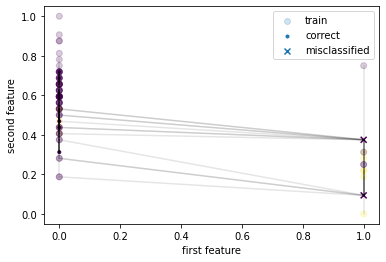

Manhattan
The training accuracy is 100.0.
Test test accuracy is 100.0.
The chosen best k is: 14


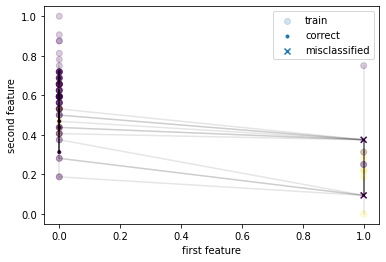

Minkowski
The training accuracy is 100.0.
Test test accuracy is 100.0.
The chosen best k is: 14


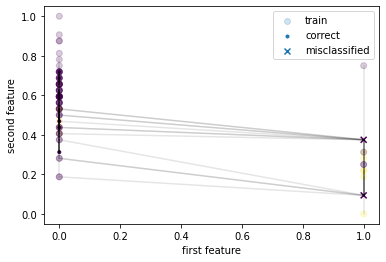

----------Predictions of KNN model variants on DB dataset-----------
Euclidean
The training accuracy is 72.5.
Test test accuracy is 63.5.
The chosen best k is: 9


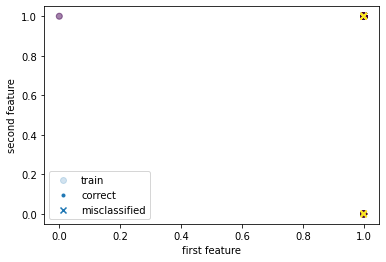

Manhattan
The training accuracy is 70.9.
Test test accuracy is 66.1.
The chosen best k is: 15


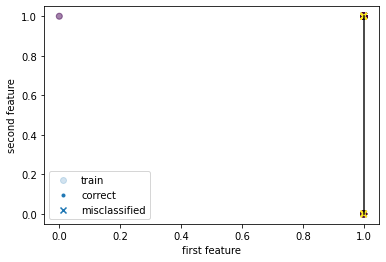

Minkowski
The training accuracy is 78.6.
Test test accuracy is 56.5.
The chosen best k is: 2


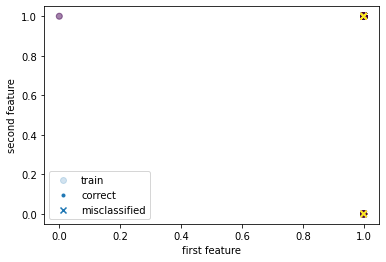

In [ ]:
hpFeatures = ["Class", "Ascites", "Albumin", "Varices", "Spiders"]
hpReduced = hp[hpFeatures]
hpReduced = hpReduced.apply(normalize)
print("----------Predictions of KNN model variants on HP dataset-----------")
x_train_hp, y_train_hp, x_val_hp, y_val_hp, x_test_hp, y_test_hp = splitSets(hpReduced)
print("Euclidean")
pred4 = predictTestOnBestHyperparam(eucliModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Manhattan")
pred5 = predictTestOnBestHyperparam(manhaModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Minkowski")
pred6 = predictTestOnBestHyperparam(MinkModelHP, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
db_normalized = db.apply(normalize)

dbFeatures = ['Class', 'PreScreen', 'Assessment', 'MA1', 'EX1', 'Euclidean', 'AM/FM', 'Diameter']
dbReduced = db[dbFeatures]
dbReduced = dbReduced.apply(normalize)
print("----------Predictions of KNN model variants on DB dataset-----------")
x_train_hp, y_train_hp, x_val_hp, y_val_hp, x_test_hp, y_test_hp = splitSets(dbReduced)
print("Euclidean")
pred1 = predictTestOnBestHyperparam(eucliModelDB, x_train_db, y_train_db, x_test_db, y_test_db)
print("Manhattan")
pred2 = predictTestOnBestHyperparam(manhaModelDB, x_train_db, y_train_db, x_test_db, y_test_db)
print("Minkowski")
pred3 = predictTestOnBestHyperparam(MinkModelDB, x_train_db, y_train_db, x_test_db, y_test_db)

#### **3.4.2 Calculating Precision and Recall of each model**

First we train each model to find the best K value and optimal depth in order to maximize the precision and recall.

Then we compare the chosen values and their associated metrics with that of accuracy.

In [ ]:
from typing import Union, Tuple, Any

# define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

# Determine best hyper-parameter K from range 1 to n-1
# n being the number of datapoints on the train set
def findBestHyperparamForPrecision(x_train, y_train, x_test, y_test, dist_fn=euclidean)\
                         -> Tuple[Union[float, Any], int, Union[Any, KNN]]:
  K_list = range(1,30)
  err_train, err_test = [], []
  all_precisions, all_training_precisions = [], []
  
  bestK = -1
  max_precision, max_training_precision = 0.0, 0.0

  for i, k in enumerate(K_list):
    # Create model    
    model: KNN = KNN(K=k, dist_fn=dist_fn).fit(x_train, y_train)

    # Predict on training and testing data
    y_prob_train, knns_train = model.predict(x_train)
    y_prob, knns = model.predict(x_test)
    

    # Gets hard predictions by choosing the class with the maximum probability
    # Returns index of largest element in array
    y_pred: list = np.argmax(y_prob, axis=-1)
    y_pred_train: list = np.argmax(y_prob_train, axis=-1)

    # Calculate accuracy
    current_precision: float = evaluate_precision(y_pred, y_test)
    current_training_precision: float = evaluate_precision(y_pred_train, y_train)

    all_precisions.append(current_precision)
    all_training_precisions.append(current_training_precision)

    # If higher accuracy, update
    if (current_precision > max_precision):
      bestK = k
      bestModel = model
      max_precision = current_precision
      max_training_precision = current_training_precision

    # boolean array to later slice the indexes of correct and incorrect predictions
    correct: np.ndarray = y_test == y_pred
    incorrect: np.ndarray = np.logical_not(correct)

    max_predict = np.argmax(model.predict(x_test)[0], axis = -1)
    err_test.append(loss(max_predict, y_test))
    
    max_train = np.argmax(model.predict(x_train)[0], axis = -1)
    err_train.append(loss(max_train, y_train))
  
  errPlot(K_list, bestK, max_precision, max_training_precision, all_precisions, all_training_precisions)

  return max_precision, bestK, bestModel

Find best K values for maximizing precisions.

In [ ]:
# Compare different distance functions
# DB
print("----------KNN models on Diabetic Retinopathy dataset-----------")
print("Euclidean")
a,b, eucliModelDB = findBestHyperparamForPrecision(
    x_train_db,
    y_train_db,
    x_val_db,
    y_val_db)

# HP
print("----------KNN models on Hepatitis dataset-----------")
print("Euclidean")
a,b, eucliModelHP = findBestHyperparamForPrecision(
    x_train_hp,
    y_train_hp,
    x_val_hp,
    y_val_hp)


----------KNN models on Diabetic Retinopathy dataset-----------
Euclidean


Finally we use the optimal K values for the precision for prediction on the test set.

In [ ]:
def predictPrecisionTestOnBestHyperparam(bestModel, x_train, y_train, x_test, y_test):
    bestModel = bestModel.fit(x_train, y_train)

    y_prob_test, knns_test = bestModel.predict(x_test)
    y_prob_train, knns_train= bestModel.predict(x_train)

    # To get hard predictions by choosing the class with the maximum probability
    y_pred = np.argmax(y_prob_test, axis=-1)
    precision = evaluate_precision(y_pred, y_test)

    y_pred_train = np.argmax(y_prob_train,axis = -1)
    training_precision = evaluate_precision(y_pred_train, y_train)

    print(f'The training precision is {training_precision *100:.1f}.')
    print(f'The test precision is {precision*100:.1f}.')
    print('The chosen best k is:', bestModel.K)

    # boolean array to later slice the indexes of correct and incorrect predictions
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)

    #visualization of the points
    plt.scatter(
        x_train[:,0],
        x_train[:,1],
        c=y_train,
        marker='o',
        alpha=.2,
        label='train')
    
    plt.scatter(
        x_test[correct,0],
        x_test[correct,1],
        marker='.',
        c=y_pred[correct],
        label='correct')
    
    plt.scatter(
        x_test[incorrect,0],
        x_test[incorrect,1],
        marker='x',
        c=y_test[incorrect],
        label='misclassified')

    #connect each node to k-nearest neighbours in the training set
    for i in range(x_test.shape[0]):
        for k in range(bestModel.K):
            hor = x_test[i,0], x_train[knns_test[i,k], 0]
            ver = x_test[i,1], x_train[knns_test[i,k], 1]
            plt.plot(hor, ver, 'k-', alpha=.1)
        
    plt.ylabel('second feature')
    plt.xlabel('first feature')
    plt.legend()
    plt.show()

    return y_pred

----------Predictions of KNN model variants on DB dataset-----------
Eucleadean
The training precision is 74.7.
The test precision is 70.0.
The chosen best k is: 7


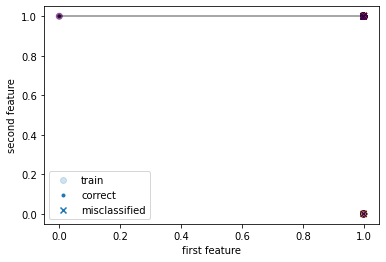

Manhattan
The training precision is 71.3.
The test precision is 70.7.
The chosen best k is: 15


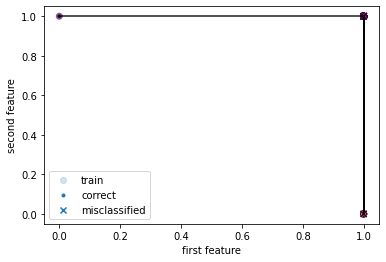

Minkowski
The training precision is 79.9.
The test precision is 65.2.
The chosen best k is: 2


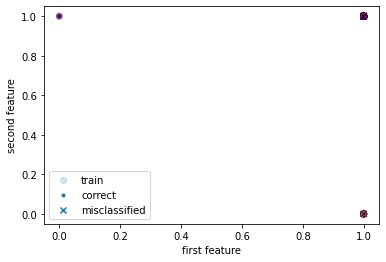

----------Predictions of KNN model variants on HP dataset-----------
Euclidean
The training precision is 70.9.
The test precision is 74.1.
The chosen best k is: 10


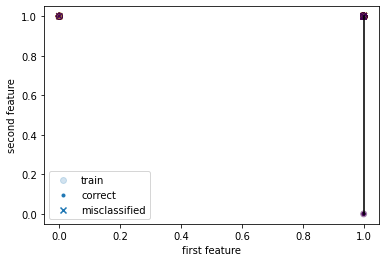

Manhattan
The training precision is 71.2.
The test precision is 73.1.
The chosen best k is: 14


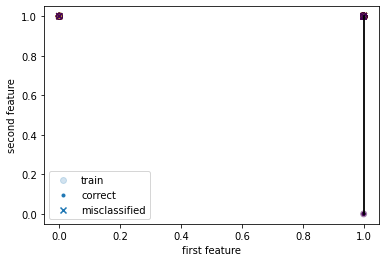

Minkowski
The training precision is 69.4.
The test precision is 69.8.
The chosen best k is: 14


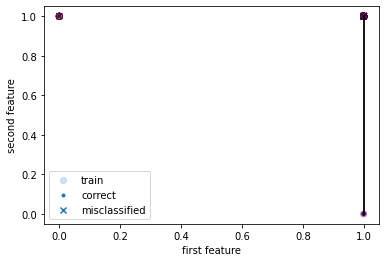

In [ ]:
# Predictions
print("----------Predictions of KNN model variants on DB dataset-----------")
print("Eucleadean")
pred1 = predictPrecisionTestOnBestHyperparam(eucliModelDB, x_train_db, y_train_db, x_val_db, y_val_db)
print("Manhattan")
pred2 = predictPrecisionTestOnBestHyperparam(manhaModelDB, x_train_db, y_train_db, x_val_db, y_val_db)
print("Minkowski")
pred3 = predictPrecisionTestOnBestHyperparam(MinkModelDB, x_train_db, y_train_db, x_val_db, y_val_db)

print("----------Predictions of KNN model variants on HP dataset-----------")
print("Euclidean")
pred4 = predictPrecisionTestOnBestHyperparam(eucliModelHP, x_train_hp, y_train_hp, x_val_hp, y_val_hp)
print("Manhattan")
pred5 = predictPrecisionTestOnBestHyperparam(manhaModelHP, x_train_hp, y_train_hp, x_val_hp, y_val_hp)
print("Minkowski")
pred6 = predictPrecisionTestOnBestHyperparam(MinkModelHP, x_train_hp, y_train_hp, x_val_hp, y_val_hp)

We repeat the same process for finding the optimal depth of the decision tree model.

In [ ]:
def findBestDepthForPrecision(x_train, y_train, x_test, y_test, depthList, costFunc):
  all_training_precisions = []
  all_test_precisions = []
  optimalDepth = 0.0
  max_precision = 0.0

  for depth in depthList:
    dTree = DecisionTree(max_depth=depth, cost_fn=costFunc)
    dTree = dTree.fit(x_train, y_train)

    predTrain = dTree.predict(x_train)
    y_predTrain = np.argmax(predTrain,1)
    current_training_precision = evaluate_precision(y_predTrain, y_train)
    all_training_precisions.append(current_training_precision)

    predTest = dTree.predict(x_test)
    y_predTest = np.argmax(predTest,1)
    current_test_precision = evaluate_precision(y_predTest, y_test)
    all_test_precisions.append(current_test_precision)
    
    if (current_test_precision > max_precision):
        max_precision = current_test_precision
        optimalDepth = depth

  print("Optimal Depth: ", optimalDepth)
  print("Precision with optimal depth", max_precision)
  plt.plot(depthList, all_training_precisions, '-', label='train', color='g')
  plt.plot(depthList, all_test_precisions, '-', label='validation', color='b')
  plt.legend()
  plt.xlabel('max depth')
  plt.ylabel('precision')
  plt.show()  
  return optimalDepth

In [ ]:
print("---------Decision Tree model Optimal Depth on HP dataset-----------")
depthList1 = list(range(2, 21))
missdepth1 = findBestDepthForPrecision(x_train_hp, y_train_hp, x_val_hp, y_val_hp, depthList1, cost_misclassification)
ginidepth1 = findBestDepthForPrecision(x_train_hp, y_train_hp, x_val_hp, y_val_hp, depthList1, cost_gini_index)
endepth1 = findBestDepthForPrecision(x_train_hp, y_train_hp, x_val_hp, y_val_hp, depthList1, cost_entropy)

print("---------Decision Tree model Optimal Depth on DB dataset-----------")

depthList2 = list(range(2, 50))
missdepth2 = findBestDepthForPrecision(x_train_db, y_train_db, x_test_db, y_test_db, depthList2, cost_misclassification)

ginidepth2 = findBestDepthForPrecision(x_train_db, y_train_db, x_test_db, y_test_db,depthList2, cost_gini_index)

endepth2 = findBestDepthForPrecision(x_train_db, y_train_db, x_test_db, y_test_db,depthList2, cost_entropy)

Finally, we use the trained models to estimate the performance on the test set.

In [ ]:
# Use test set to estimate the performance
def predTreeOnTest(decisionTree, x_train, y_train, x_test, y_test):
  decisionTree.fit(x_train, y_train)

  predT = decisionTree.predict(x_train)
  y_predT = np.argmax(predT,1)
  precision = evaluate_precision(y_predT, y_train)
  print("Training Precision :", precision)
  predTest = decisionTree.predict(x_test)
  y_predTest = np.argmax(predTest,1)
  test_precision = evaluate_precision(y_predTest, y_test)
  print("Testing Precision :", test_precision)

  # visualization
  correct = y_test == y_predTest
  incorrect = np.logical_not(correct)
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
  plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_predTest[correct], label='correct')
  plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
  plt.legend()
  plt.show()

  return precision, test_precision

  
print("Test set to estimate the performance with Misclassification Cost: Hepatitis")
missTree1 = DecisionTree(max_depth=missdepth1, cost_fn=cost_misclassification)
precisionM1, precisoinTestM1 = predTreeOnTest(missTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

print("Use test set to estimate the performance with Misclassification Cost: Diabetic")
missTree2 = DecisionTree(max_depth=missdepth2, cost_fn=cost_misclassification)
precisionM2, precisionTestM2 = predTreeOnTest(missTree2, x_train_db, y_train_db, x_test_db, y_test_db)


print("Use test set to estimate the performance with Entropy: Hepatitis")
enTree1 = DecisionTree(max_depth=endepth1, cost_fn=cost_entropy)
precisionE1, precisionTestE1 = predTreeOnTest(enTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)


print("Use test set to estimate the performance with Entropy: Diabetic")
enTree2 = DecisionTree(max_depth=endepth2,cost_fn=cost_entropy)
precisionE2, precisionTestE2 = predTreeOnTest(enTree2, x_train_db, y_train_db, x_test_db, y_test_db)

print("Use test set to estimate the performance with Gini Index: Hepatitis")
giniTree1 = DecisionTree(max_depth=ginidepth1, cost_fn=cost_gini_index)
precisionG1, precisionTest1 = predTreeOnTest(giniTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Use test set to estimate the performance with Gini Index: Diabetic")
giniTree2 = DecisionTree(max_depth=ginidepth2, cost_fn=cost_gini_index)
precisionG2, precisionTest2 = predTreeOnTest(giniTree2, x_train_db, y_train_db, x_test_db, y_test_db)

Now we repeat the same experiments for finding the best K and depth values to maximize the recall values.

In [ ]:
from typing import Union, Tuple, Any

# define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

# Determine best hyper-parameter K from range 1 to n-1
# n being the number of datapoints on the train set
def findBestHyperparamForRecall(x_train, y_train, x_test, y_test, dist_fn=euclidean)\
                         -> Tuple[Union[float, Any], int, Union[Any, KNN]]:
  K_list = range(1,30)
  err_train, err_test = [], []
  all_recalls, all_training_recalls = [], []
  
  bestK = -1
  max_recall, max_training_recall = 0.0, 0.0

  for i, k in enumerate(K_list):
    # Create model    
    model: KNN = KNN(K=k, dist_fn=dist_fn).fit(x_train, y_train)

    # Predict on training and testing data
    y_prob_train, knns_train = model.predict(x_train)
    y_prob, knns = model.predict(x_test)
    
    # Gets hard predictions by choosing the class with the maximum probability
    # Returns index of largest element in array
    y_pred: list = np.argmax(y_prob, axis=-1)
    y_pred_train: list = np.argmax(y_prob_train, axis=-1)

    # Calculate accuracy
    current_recall: float = evaluate_recall(y_pred, y_test)
    current_training_recall: float = evaluate_recall(y_pred_train, y_train)

    all_recalls.append(current_recall)
    all_training_recalls.append(current_training_recall)

    # If higher accuracy, update
    if (current_recall > max_recall):
      bestK = k
      bestModel = model
      max_recall = current_recall
      max_training_recall = current_training_recall

    # boolean array to later slice the indexes of correct and incorrect predictions
    correct: np.ndarray = y_test == y_pred
    incorrect: np.ndarray = np.logical_not(correct)

    max_predict = np.argmax(model.predict(x_test)[0], axis = -1)
    err_test.append(loss(max_predict, y_test))
    
    max_train = np.argmax(model.predict(x_train)[0], axis = -1)
    err_train.append(loss(max_train, y_train))
  
  errPlot(K_list, bestK, max_recall, max_training_recall, all_recalls, all_training_recalls)

  return max_recall, bestK, bestModel

In [ ]:
# Compare different distance functions
# DB
print("----------KNN models on Diabetic Retinopathy dataset-----------")
print("Euclidean")
a,b, eucliModelDB = findBestHyperparamForRecall(
    x_train_db,
    y_train_db,
    x_val_db,
    y_val_db)

# HP
print("----------KNN models on Hepatitis dataset-----------")
print("Euclidean")
a,b, eucliModelHP = findBestHyperparamForRecall(
    x_train_hp,
    y_train_hp,
    x_val_hp,
    y_val_hp)


We find the optimal depth for maximizing recall with the decision tree model.

In [ ]:
def findBestDepthForRecall(x_train, y_train, x_test, y_test, depthList, costFunc):
  all_training_recalls = []
  all_test_recalls = []
  optimalDepth = 0.0
  max_recall = 0.0

  for depth in depthList:
    dTree = DecisionTree(max_depth=depth, cost_fn=costFunc)
    dTree = dTree.fit(x_train, y_train)

    predTrain = dTree.predict(x_train)
    y_predTrain = np.argmax(predTrain,1)
    current_training_recall = evaluate_recall(y_predTrain, y_train)
    all_training_recalls.append(current_training_recall)

    predTest = dTree.predict(x_test)
    y_predTest = np.argmax(predTest,1)
    current_test_recall = evaluate_recall(y_predTest, y_test)
    all_test_recalls.append(current_test_recall)
    
    if (current_test_recall > max_recall):
        max_recall = current_test_recall
        optimalDepth = depth

  print("Optimal Depth: ", optimalDepth)
  print("Precision with optimal depth", max_recall)
  plt.plot(depthList, all_training_recalls, '-', label='train', color='g')
  plt.plot(depthList, all_test_recalls, '-', label='validation', color='b')
  plt.legend()
  plt.xlabel('max depth')
  plt.ylabel('recall')
  plt.show()  
  return optimalDepth

In [ ]:
print("---------Decision Tree model Optimal Depth on HP dataset-----------")
depthList1 = list(range(2, 21))
missdepth1 = findBestDepthForRecall(x_train_hp, y_train_hp, x_val_hp, y_val_hp, depthList1, cost_misclassification)

print("---------Decision Tree model Optimal Depth on DB dataset-----------")

In [ ]:
# Use test set to estimate the performance
def predTreeOnTestForRecall(decisionTree, x_train, y_train, x_test, y_test):
  decisionTree.fit(x_train, y_train)

  predT = decisionTree.predict(x_train)
  y_predT = np.argmax(predT,1)
  recall = evaluate_recall(y_predT, y_train)
  print("Training Recall :", recall)
  predTest = decisionTree.predict(x_test)
  y_predTest = np.argmax(predTest,1)
  test_recall = evaluate_recall(y_predTest, y_test)
  print("Testing Recall :", test_recall)

  # visualization
  correct = y_test == y_predTest
  incorrect = np.logical_not(correct)
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
  plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_predTest[correct], label='correct')
  plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
  plt.legend()
  plt.show()

  return recall, test_recall

  
print("Test set to estimate the performance with Misclassification Cost: Hepatitis")
missTree1 = DecisionTree(max_depth=missdepth1, cost_fn=cost_misclassification)
recallM1, recallTestM1 = predTreeOnTestForRecall(missTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)

print("Use test set to estimate the performance with Misclassification Cost: Diabetic")
missTree2 = DecisionTree(max_depth=missdepth2, cost_fn=cost_misclassification)
recallM2, recallTestM2 = predTreeOnTestForRecall(missTree2, x_train_db, y_train_db, x_test_db, y_test_db)


print("Use test set to estimate the performance with Entropy: Hepatitis")
enTree1 = DecisionTree(max_depth=endepth1, cost_fn=cost_entropy)
recallE1, recallTestE1 = predTreeOnTestForRecall(enTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)


print("Use test set to estimate the performance with Entropy: Diabetic")
enTree2 = DecisionTree(max_depth=endepth2,cost_fn=cost_entropy)
recallE2, recallTestE2 = predTreeOnTestForRecall(enTree2, x_train_db, y_train_db, x_test_db, y_test_db)

print("Use test set to estimate the performance with Gini Index: Hepatitis")
giniTree1 = DecisionTree(max_depth=ginidepth1, cost_fn=cost_gini_index)
recallG1, recallTest1 = predTreeOnTestForRecall(giniTree1, x_train_hp, y_train_hp, x_test_hp, y_test_hp)
print("Use test set to estimate the performance with Gini Index: Diabetic")
giniTree2 = DecisionTree(max_depth=ginidepth2, cost_fn=cost_gini_index)
recallG2, recallTest2 = predTreeOnTestForRecall(giniTree2, x_train_db, y_train_db, x_test_db, y_test_db)